In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns
import re
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
fpath = '../../resources/lipid-data-groups.csv'
group_levels = pd.read_csv(fpath, header=[0, 1], index_col=0)
group_levels.head()

ChAc 1                        ChAc 2                        ChAc 3  \
          CN   Putamen     DLPFC        CN   Putamen     DLPFC        CN   
FC  74.76526  85.28993  77.60351  62.75982  84.16329  71.32924  85.05140   
CE   3.11056   1.05517   2.23171   2.71915   0.59530   1.01722   1.20094   
AC   0.21767   0.12956   0.17994   0.24392   0.06999   0.14556   0.08813   
MG   0.06494   0.02671   0.02192   0.08738   0.02618   0.03270   0.02797   
DG   0.61273   0.74028   0.50084   0.68331   0.91864   0.45451   0.53963   

                       Control 1  ... Control 4 Control 5                      \
     Putamen     DLPFC        CN  ...     DLPFC        CN   Putamen     DLPFC   
FC  77.70036  79.20319  86.01249  ...  83.43361  72.05994  80.88242  74.07980   
CE   2.43606   1.17550   0.59214  ...   0.38238   3.70715   2.36220   1.27923   
AC   0.18725   0.08959   0.04726  ...   0.04146   0.17098   0.10491   0.24669   
MG   0.06788   0.03000   0.02171  ...   0.02556   0.03219   0.02436   0.05155   
DG   0.56864   0.43298   0.93269  ...   0.31929   0.60878   0.42807   0.70727   

   Control 6                        ChAc 4                      
          CN   Putamen     DLPFC        CN   Putamen     DLPFC  
FC  70.35621  73.44837  76.29813  85.80184  80.74627  66.70411  
CE   1.51144   1.26920   0.89684   1.41653   1.72224   2.46848  
AC   0.05078   0.07467   0.07863   0.03312   0.03876   0.09821  
MG   0.02505   0.02184   0.02339   0.01612   0.03198   0.02808  
DG   0.44212   0.34882   0.38706   0.47798   0.52203   0.45474  

[5 rows x 30 columns]

In [3]:
# import data
fpath = '../../resources/lipid-data-species.csv'
species_levels = pd.read_csv(fpath, header=[0, 1], index_col=0)
# add species group
ix0 = [re.sub('^(\S+)\s.*$', '\\1', s) for s in species_levels.index]
species_levels.index = pd.MultiIndex.from_arrays([ix0, species_levels.index])
# tick locations and labels for heatmap
g, ix = np.unique(ix0, return_index=True)
group_info = pd.DataFrame({'ticks': ix}, index=g).sort_values('ticks')
# Reorder columns to group Control and ChAc subjects together
c0 = ['Control ' + str(i + 1) for i in range(6)] + ['ChAc ' + str(i + 1) for i in range(4)]
c1 = ['CN', 'Putamen', 'DLPFC']
species_levels.columns = pd.MultiIndex.from_product([c0, c1])
species_levels.head(30)

Control 1                     Control 2                      \
                   CN   Putamen     DLPFC        CN   Putamen     DLPFC   
FC FC        74.76526  85.28993  77.60351  62.75982  84.16329  71.32924   
CE CE 16:0    0.03044   0.01244   0.04252   0.03787   0.00420   0.01368   
   CE 16:1    0.05864   0.01115   0.01464   0.04703   0.00403   0.00517   
   CE 18:0    0.00931   0.00414   0.00440   0.01182   0.00190   0.00256   
   CE 18:1    0.43162   0.13324   0.25082   0.48678   0.07193   0.10172   
   CE 18:2    0.54505   0.29602   0.94540   0.37274   0.13997   0.38839   
   CE 20:0    0.00138   0.00032   0.00060   0.00132   0.00007   0.00011   
   CE 20:1    0.03404   0.00715   0.00436   0.02692   0.00249   0.00173   
   CE 20:2    0.03671   0.01074   0.00521   0.03684   0.00456   0.00236   
   CE 20:3    0.24984   0.07793   0.08287   0.22735   0.04132   0.02105   
   CE 20:4    0.88767   0.31144   0.67637   0.57576   0.20410   0.35263   
   CE 22:2    0.02887   0.00514   0.00346   0.01999   0.00151   0.00129   
   CE 22:3    0.02075   0.00810   0.00366   0.02015   0.00296   0.00107   
   CE 22:4    0.24869   0.05789   0.05521   0.15575   0.03289   0.03410   
   CE 22:5    0.09552   0.02101   0.01643   0.09447   0.01160   0.01297   
   CE 22:6    0.30667   0.06839   0.10299   0.46214   0.06235   0.07364   
   CE 24:2    0.02679   0.00309   0.00478   0.02439   0.00057   0.00081   
   CE 24:3    0.01480   0.00281   0.00121   0.00905   0.00044   0.00021   
   CE 24:4    0.05016   0.01567   0.01271   0.05089   0.00421   0.00217   
   CE 24:5    0.02704   0.00698   0.00377   0.04132   0.00308   0.00135   
   CE 24:6    0.00657   0.00150   0.00029   0.01657   0.00114   0.00020   
AC AC C12:0   0.00102   0.00276   0.00202   0.00110   0.00059   0.00100   
   AC C14:0   0.00384   0.00869   0.00716   0.00387   0.00533   0.00380   
   AC C16:0   0.05447   0.04239   0.06223   0.05219   0.02379   0.04106   
   AC C18:0   0.10680   0.03943   0.05837   0.12909   0.01370   0.05556   
   AC C18:1   0.04933   0.03509   0.04869   0.05484   0.02636   0.04297   
   AC C2:0    0.00080   0.00036   0.00053   0.00125   0.00010   0.00076   
   AC C3:0    0.00016   0.00009   0.00018   0.00068   0.00004   0.00013   
   AC C6:0    0.00108   0.00071   0.00047   0.00078   0.00007   0.00019   
   AC C8:0    0.00018   0.00002   0.00029   0.00011   0.00000   0.00009   

            Control 3                     Control 4  ...    ChAc 1    ChAc 2  \
                   CN   Putamen     DLPFC        CN  ...     DLPFC        CN   
FC FC        85.05140  77.70036  79.20319  86.01249  ...  83.43361  72.05994   
CE CE 16:0    0.01314   0.01882   0.01134   0.00386  ...   0.00541   0.02824   
   CE 16:1    0.00747   0.01784   0.00608   0.00462  ...   0.00369   0.01632   
   CE 18:0    0.00343   0.00509   0.00151   0.00285  ...   0.00181   0.01581   
   CE 18:1    0.11446   0.19721   0.09036   0.07647  ...   0.04191   0.32748   
   CE 18:2    0.47290   0.76077   0.45989   0.10556  ...   0.11691   0.47351   
   CE 20:0    0.00003   0.00025   0.00008   0.00011  ...   0.00003   0.00158   
   CE 20:1    0.00204   0.00578   0.00181   0.00436  ...   0.00076   0.03778   
   CE 20:2    0.00396   0.01149   0.00249   0.00653  ...   0.00128   0.04351   
   CE 20:3    0.03887   0.10324   0.03649   0.04538  ...   0.01133   0.35395   
   CE 20:4    0.43886   0.76874   0.42763   0.19445  ...   0.13971   0.41054   
   CE 22:2    0.00091   0.00319   0.00118   0.00279  ...   0.00034   0.03118   
   CE 22:3    0.00322   0.00661   0.00167   0.00352  ...   0.00067   0.03868   
   CE 22:4    0.03196   0.08386   0.03235   0.04066  ...   0.01383   0.22809   
   CE 22:5    0.01088   0.06866   0.01358   0.01007  ...   0.00672   0.20828   
   CE 22:6    0.05391   0.35820   0.08367   0.07925  ...   0.03673   1.14117   
   CE 24:2    0.00021   0.00170   0.00062   0.00122  ...   0.00012   0.01457   
   CE 24:3    0.00037   0.00130   0.00025   0.00069  ...   0.00009   0.00784   
   CE 24:4 

In [4]:
def normalize(data):
    Min = data.min(axis=1)
    Max = data.max(axis=1)
    val = data.apply(lambda x: (x - Min) / (Max - Min), axis=0)
    return(val)

normalize(species_levels)

Control 1                     Control 2                      \
                       CN   Putamen     DLPFC        CN   Putamen     DLPFC   
FC   FC          0.495641  0.930149  0.612818  0.000000  0.883636  0.353786   
CE   CE 16:0     0.687532  0.221935  1.000000  0.879721  0.008795  0.254009   
     CE 16:1     1.000000  0.135760  0.199272  0.788717  0.006187  0.026934   
     CE 18:0     0.545455  0.183916  0.202098  0.720979  0.027273  0.073427   
     CE 18:1     0.808058  0.189371  0.433172  0.922431  0.062246  0.124015   
...                   ...       ...       ...       ...       ...       ...   
NSer NSer 16:1   0.123435  0.288014  0.000000  0.078712  0.533095  0.041145   
     NSer 18:0   0.116516  0.359729  0.158371  0.064480  0.510181  0.134615   
     NSer 18:1   0.158072  0.545404  0.105381  0.065022  0.845852  0.122197   
     NSer 20:4   0.186207  0.020690  0.234483  0.400000  0.000000  0.682759   
     NSer 22:6   0.130435  0.000000  0.286957  0.200000  0.000000  0.739130   

                Control 3                     Control 4  ...    ChAc 1  \
                       CN   Putamen     DLPFC        CN  ...     DLPFC   
FC   FC          0.920302  0.616816  0.678860  0.959980  ...  0.853512   
CE   CE 16:0     0.240041  0.386963  0.193482  0.000000  ...  0.040093   
     CE 16:1     0.068790  0.257507  0.043494  0.016924  ...  0.000000   
     CE 18:0     0.134266  0.250350  0.000000  0.093706  ...  0.020979   
     CE 18:1     0.150431  0.322012  0.100460  0.071660  ...  0.000000   
...                   ...       ...       ...       ...  ...       ...   
NSer NSer 16:1   0.221825  0.089445  0.157424  0.316637  ...  0.187835   
     NSer 18:0   0.114253  0.000000  0.124434  0.390271  ...  0.277149   
     NSer 18:1   0.329596  0.000000  0.158072  0.739910  ...  0.365471   
     NSer 20:4   0.027586  0.275862  0.144828  0.179310  ...  0.089655   
     NSer 22:6   0.000000  0.130435  0.182609  0.017391  ...  0.034783   

                   ChAc 2                        ChAc 3                      \
                       CN   Putamen     DLPFC        CN   Putamen     DLPFC   
FC   FC          0.383953  0.748186  0.467342  0.313615  0.441274  0.558925   
CE   CE 16:0     0.630626  0.237455  0.220900  0.284014  0.166580  0.103725   
     CE 16:1     0.229845  0.161783  0.042220  0.243312  0.076797  0.025478   
     CE 18:0     1.000000  0.491608  0.069231  0.124476  0.041958  0.016783   
     CE 18:1     0.592125  0.385129  0.177718  0.330430  0.167144  0.037157   
...                   ...       ...       ...       ...       ...       ...   
NSer NSer 16:1   0.236136  0.262970  0.203936  0.118068  0.075134  0.026834   
     NSer 18:0   0.536199  0.382353  0.366516  0.278281  0.248869  0.316742   
     NSer 18:1   0.529709  0.379484  0.479821  0.258408  0.207960  0.210762   
     NSer 20:4   0.882759  0.593103  0.800000  0.496552  0.641379  0.820690   
     NSer 22:6   0.643478  0.278261  0.660870  0.260870  0.347826  0.800000   

                   ChAc 4                      
                       CN   Putamen     DLPFC  
FC   FC          0.951283  0.742565  0.162839  
CE   CE 16:0     0.271081  0.394465  0.783756  
     CE 16:1     0.102093  0.058235  0.127934  
     CE 18:0     0.222378  0.216783  0.420979  
     CE 18:1     0.262524  0.279112  0.420233  
...                   ...       ...       ...  
NSer NSer 16:1   0.191413  0.348837  0.042934  
     NSer 18:0   0.220588  0.280543  0.233032  
     NSer 18:1   0.414238  0.420404  0.208520  
     NSer 20:4   0.317241  0.627586  1.000000  
     NSer 22:6   0.069565  0.121739  0.817391  

[593 rows x 30 columns]

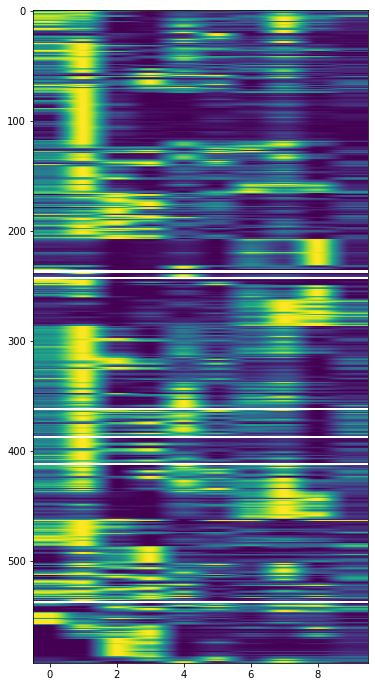

In [5]:
fig, ax = plt.subplots(figsize=(6, 12))
ax.imshow(normalize(species_levels.xs('CN', axis=1, level=1)), aspect='auto')

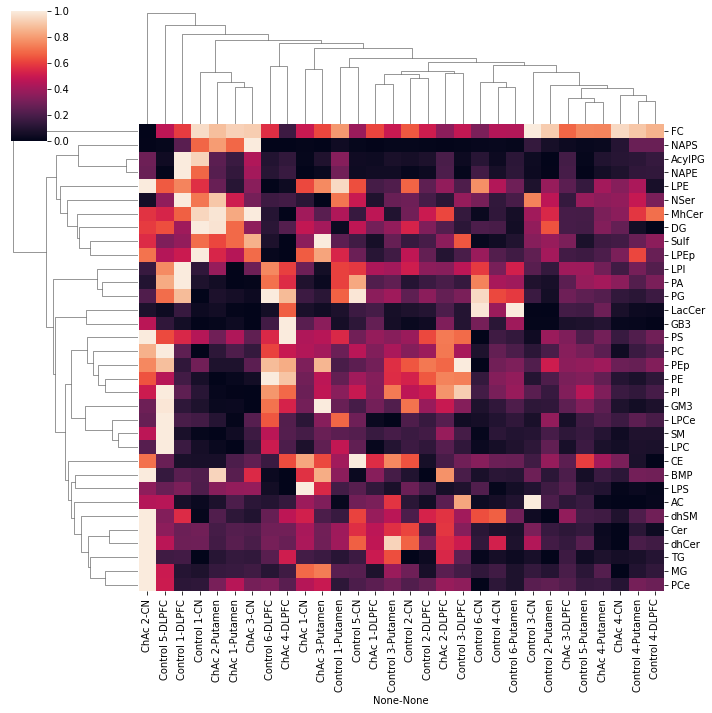

In [6]:
sns.clustermap(group_levels, standard_scale=0)

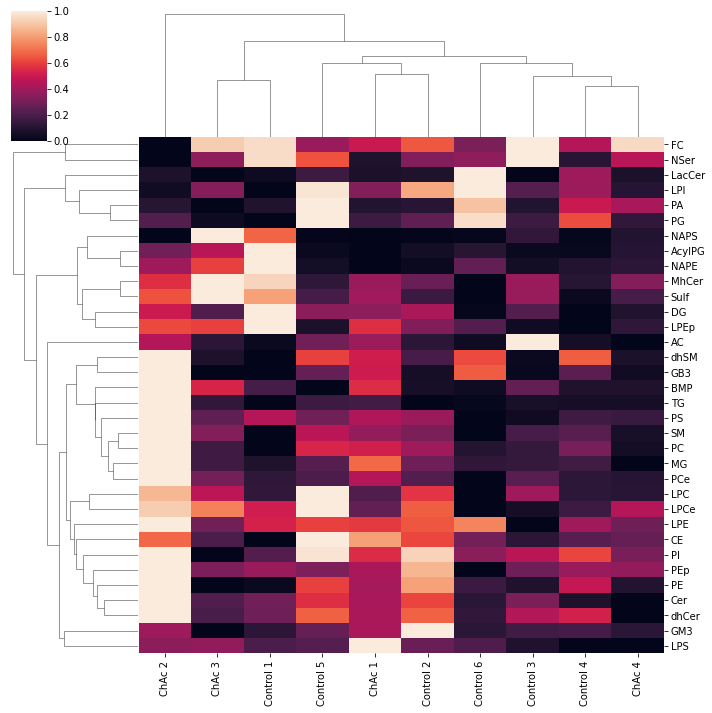

In [7]:
sns.clustermap(group_levels.xs('CN', axis=1, level=1), standard_scale=0)

In [8]:
%connect_info

{
  "shell_port": 50026,
  "iopub_port": 50027,
  "stdin_port": 50028,
  "control_port": 50030,
  "hb_port": 50029,
  "ip": "127.0.0.1",
  "key": "0c9e3699-08ac330a2cb64037edd038e8",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-a8a55b98-e1ac-4cbf-99c1-a9cad3d41585.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
